

Behavioral Data Exploration
___________________________
The experiment provided the EEG dataset contains a certain pipeline:

    1. BDM: Pictures of different products were presented to the participants.
            After every trial they rated the monetary value of the product- 'label'

    2. AD: The subjects watched different commersials dedicated to the same products 
        and rated their monetary value again, addtionaly to 'liking' rating for each commersial.

This notebook aimed for analysing and graphing the statistical nature of the behavioral dataset
For furtuer information about the dataset structure see the README file



In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from classes_and_functions import MatlabDataImporter
import cleanup_func
from tests import *


The matlab file is ready to be read! 
 Use the "read_data" method to load it
Reading data into a python dict
resulting keys will be corroborated with expected fields for the
analysis to continue smoothly
fields are checked - we're good to go!
use the "parse_data" method next
Parsing the data from the dict into DataFrames...

Done! The data is organized in DataFrames.
The next phase of the process is cleaning the data with the "clean_dfs" method
DataFrames are clean, The next stage of the process is testing, with "test_dfs" (method)
                 item   category  label
0              Neviot  Beverages   80.6
1      Zippersmallbag     Hygene  100.0
2              Sano99     Hygene  100.0
3     Branflakesextra  Breakfast   70.7
4              Prince   DryGoods  100.0
...               ...        ...    ...
3595         GelDeLin     Hygene   39.3
3596           Sano99     Hygene   86.7
3597           Neviot  Beverages   84.8
3598  ChocolateSpread  Breakfast   17.4
3599           Quaker 

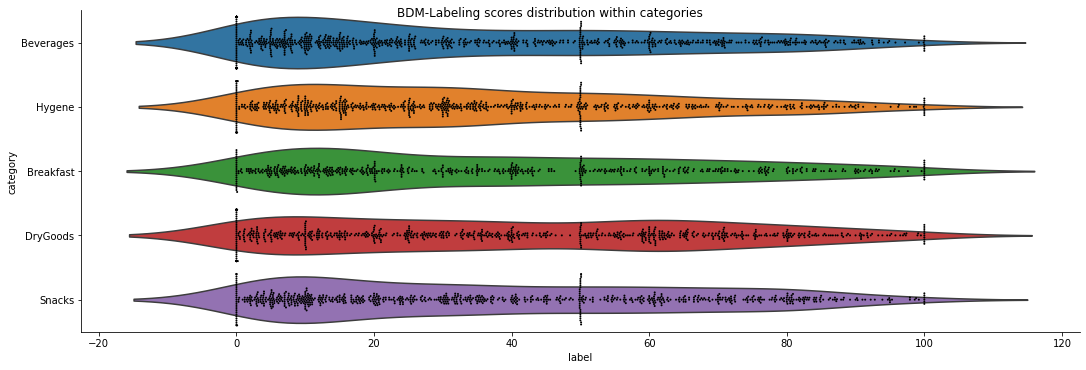

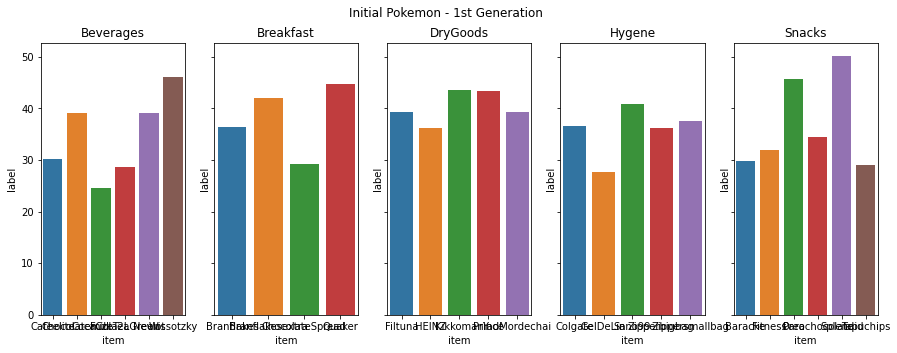

In [92]:

def read(self):
        """
        Reads a *.tif* image to self.data and returns it as well.
        """
        self.data = tifffile.imread(file)
        return self.data

    def summarize(self) -> float:
        """
        Returns the mean of the data.

        Returns
        -------
        float
            Data mean
        """
        return self.data.mean()

class BehavioralDataExploration(MatlabDataReader):

   def __init__(self,path):
       MatlabDataImporter.__init__(self,path)
       
    def orgenize(self):
        bdm_df = self.bdm_df
        ad_df = self.ad_df
        itemed_df= bdm_df[["item","category","label"]]
        itemed_df["label"]=itemed_df["label"].astype('float')

# Create an MatlabDataImporter object containing the EEG data-set

# data_set=MatlabDataImporter(path=r'D:\YanivA01\Documents\Python\PyCourse\AllEEG.mat')

# Read, parse and clean the data set via  classes_and_functions

data_set.read_data()
data_set.parse_data()
data_set.clean_dfs()

bdm_df= data_set.bdm_df
ad_df= data_set.ad_df

def bdm_label_distribution(bdm_df):
    """
    Produces graphical display of the labeling distribution
    between categories and within categories

    "label" column contains numeric values between 0-100
    one category can contain multiple items

    Parameters
    ----------
    bdm_df: pandas DataFrame
        containing the BDM dataset

    """

    # Data organization 

    itemed_df= bdm_df[["item","category","label"]]
    itemed_df["label"]=itemed_df["label"].astype('float')

    # Graphing label distribution in each category

    g = sns.catplot(x="label", 
                    y="category", 
                    kind="violin", 
                    inner=None, 
                    data=itemed_df,
                    height=5, 
                    aspect=3)
    _=sns.swarmplot(x="label", 
                    y="category",
                     color="black", 
                     size=2, 
                     data=itemed_df, 
                     ax=g.ax)
    _=g.fig.suptitle("BDM-Labeling scores distribution within categories")

    # Graphing label distribution in each item
    itemed_grouped=itemed_df.groupby(['category','item']).mean("label")
    itemed_grouped=itemed_grouped.reset_index()
    categories= itemed_grouped['category'].unique()

    fig, axes = plt.subplots(1, len(categories), figsize=(20, 5), sharey=True)
    fig.suptitle('Initial Pokemon - 1st Generation')
    for i,category in enumerate(categories) :
        data= itemed_grouped.loc[itemed_grouped['category']==category]
        sns.barplot(ax=axes[i],
                    data=data, 
                    x='item', 
                    y='label')
        axes[i].set_title(category)


        

bdm_label_distribution(bdm_df)




In [ ]:
def ad_marketing_power(ad_df):
    """
    1. Plotting home many ads exist for each item
    2. Analyze and plot which ad best raised the label value 


    Parameters
    ----------
    ad_df: pandas DataFrame
        containing the AD dataset

    """

    




ad_marketing_power(ad_df)
